### Stage 1. Study_Groups_Category.csv

The `Study_Groups_Category.csv` file provides demographic and contextual information about each study group involved in the research. Key columns include:
- **report_id** – Unique identifier for each report, allowing for data linkage across files.
- **study_id** – Unique identifier for each study within the reports.
- **s_country** – Country where the study was conducted, helping to assess the geographical scope of the data.
- **s_setting** – Describes the study setting (e.g., clinical, community), providing context on the environment where data was collected.
- **s_start** – Start date of the study, indicating when data collection began.
- **s_end** – End date of the study, showing the study’s overall duration.
- **s_duration** – Numeric duration of the study, giving a quick understanding of the study period.
- **s_n** – Number of participants in each group, essential for understanding the scale of each study.
- **s_diag** – General code for participants' diagnoses, which classifies medical conditions.
- **s_diag_spec** – Detailed description of diagnoses, offering a more precise medical context for the group.
- **diag_category** – Diagnosis category, providing an additional generalized classification, useful for analyzing large groups.
- **s_female** – Percentage of females in the group, supporting demographic analysis by gender.
- **s_age_mt** – Mean age of the treatment group, useful for assessing age distribution within this category.
- **s_age_mc** – Mean age of the control group, allowing for comparison of age characteristics.

These columns offer comprehensive information for analyzing study group characteristics, demographics, and diagnoses, providing deeper insight into the context of the data collected.

This file is crucial for assessing the diversity and characteristics of the study groups, enabling a deeper analysis of outcomes based on participant backgrounds.

### Exploring the Study Groups Category

Now, let’s get to know our study groups a bit better! We’ll start by downloading `Study_Groups_Category.csv`, which will give us insights into who participated in each study – their demographics, health conditions, and more. This information will help us understand the context and diversity of the participants involved.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [13]:
study_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\NEW_JOB\Pet Projects\Meditation_Stress_Project\Cleaned data\Study_Groups_Category.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

In [24]:
print(study_df.head(10))

   report_id  study_id      s_country  s_setting    s_start      s_end  \
0         73        66            USA        1.0 2006-09-01 2007-10-31   
1         80        73            USA        1.0 2007-07-06 2010-01-11   
2         15        14         Canada        1.0 2007-10-01 2010-12-31   
3         49        43            USA        1.0 2008-01-01 2011-01-31   
4         46        40            USA        1.0 2008-03-01 2013-02-28   
5         42        36         Canada        1.0 2008-09-01 2012-07-31   
6          8         7  Great Britain        1.0 2008-10-01 2011-12-31   
7         84        77            USA        1.0 2008-10-01 2014-01-31   
8         55        49            USA        4.0 2009-01-07 2010-04-30   
9         27        23            USA        1.0 2009-05-01 2013-04-30   

   s_duration    s_n  s_diag  \
0         1.0   40.0     1.0   
1         3.0   68.0     1.0   
2         3.0  271.0     1.0   
3         3.0   55.0     1.0   
4         5.0   93.0     

In [25]:
print(study_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   report_id            76 non-null     int64         
 1   study_id             76 non-null     int64         
 2   s_country            76 non-null     object        
 3   s_setting            73 non-null     float64       
 4   s_start              56 non-null     datetime64[ns]
 5   s_end                48 non-null     datetime64[ns]
 6   s_duration           49 non-null     float64       
 7   s_n                  75 non-null     float64       
 8   s_diag               75 non-null     float64       
 9   s_diag_spec          75 non-null     object        
 10  diag_category        76 non-null     object        
 11  s_female             37 non-null     float64       
 12  s_age_mt             21 non-null     object        
 13  s_age_mc             21 non-null     

In [26]:
print(study_df.describe(include='all'))

        report_id   study_id s_country  s_setting              s_start  \
count   76.000000  76.000000        76  73.000000                   56   
unique        NaN        NaN        14        NaN                  NaN   
top           NaN        NaN       USA        NaN                  NaN   
freq          NaN        NaN        39        NaN                  NaN   
mean    45.000000  40.131579       NaN   1.369863  2013-03-06 15:00:00   
min      1.000000   1.000000       NaN   1.000000  2006-09-01 00:00:00   
25%     23.750000  20.750000       NaN   1.000000  2011-02-15 06:00:00   
50%     46.500000  40.500000       NaN   1.000000  2013-06-01 00:00:00   
75%     65.250000  59.250000       NaN   1.000000  2015-03-16 06:00:00   
max     85.000000  78.000000       NaN   4.000000  2024-08-09 00:00:00   
std     24.511766  22.522488       NaN   0.935516                  NaN   

                      s_end  s_duration         s_n     s_diag  \
count                    48   49.000000   75.

## Initial Data Exploration Summary

To get a sense of the data, we used three functions:

1. **Head**: Displayed the first few rows of the dataset to check the overall structure and data format.
2. **Describe**: Provided summary statistics, including mean, min, max, and counts, to understand numerical and categorical distributions.
3. **Info**: Displayed information about data types, non-null counts, and memory usage, helping us assess the quality and completeness of the data.

- **First Peek**: The file gives us a snapshot of the study groups with fields like `report_id`, `study_id`, `s_country`, `s_diag`, and demographics such as `s_female` and age information.
- **Descriptive Stats**:
  - **Country**: Studies span 14 countries, with the U.S. as the most frequent location.
  - **Sample Sizes** (`s_n`): Ranges significantly from 22 to 485 participants per group.
  - **Age and Gender**: Not all age or gender data is complete, but the mean age for available records centers around 43 years and 62% of female.
  - **Duration**: From several weeks to 6 years
  - **Most popular diagnosis**: Depressive disorder
- **Data Structure**:
  - The dataset has 76 entries across 14 columns.
  - Certain columns, like `s_start`, `s_end`, `s_duration`, and `s_female`, contain missing values that may require cleaning.

### Next Steps:
1. **Address Missing Data**: We’ll handle missing values in `s_female`, `s_age_mt`, `s_age_mc`, and date fields.
2. **Standardize Date Fields and GANNT vizualisation**: Convert `s_start` and `s_end` to a consistent date format.
3. **Prepare for Analysis**: Ensure categorical columns, such as `s_country` and `diag_category`, are standardized for easier analysis.

## Observing Missing Data

Let’s take a closer look at the gaps in our data. The heatmap reveals:

- **Concentrated Gaps**: Key columns like `s_female`, `s_age_mt`, and `s_age_mc` show noticeable missing values, suggesting demographic data may need filling.
- **Date Gaps**: Some studies lack start (`s_start`) and end (`s_end`) dates, indicating potential gaps in timeline data.

This snapshot gives us direction on where to focus next to keep our analysis accurate and comprehensive.

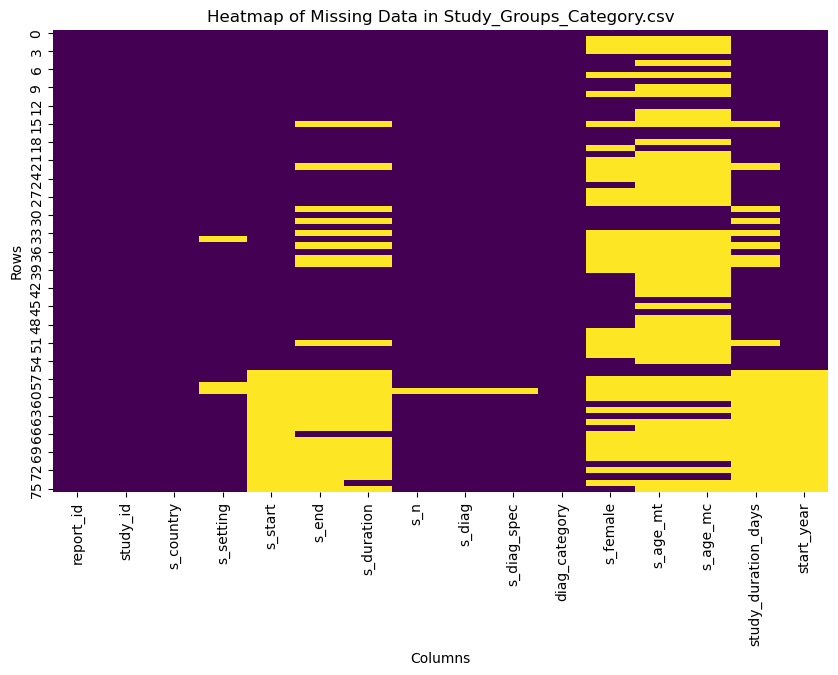

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(study_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data in Study_Groups_Category.csv")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## **Standardize Date Fields and Building the Gantt Chart:

Let's dive into how we visualized the study durations with a Gantt chart! Our main goal here was to capture the timeline of each study, showing when they started, how long they lasted, and the periods with the most research activity.

- **Step 1: Preparing the Data**:
First, we ensured that the `S-START` and `S-END` columns were in the correct date format. This step was essential for accurate calculations of each study’s duration. With these dates ready, we calculated the length of each study in days by simply subtracting the start date from the end date. This gave us a new column, `study_duration_days`, which we could use directly in our Gantt chart.

- **Step 2: Sorting for a Clear Timeline**:
To make the chart readable and logical, we sorted the data by start date. This way, our Gantt chart displayed the studies in a clear, chronological sequence, allowing us to see the flow of research over time.

- **Step 3: Constructing the Gantt Bars**:
Using the powerful `matplotlib` library, we created horizontal bars for each study, where the bar length reflected the study’s duration. By aligning the bars with their start dates, we could see precisely when each study took place.


- **Step 4: Adding Insights to the Chart**:
Next, we wanted to go beyond just showing the timeline. We extracted the year from each start date and counted the studies per year. This allowed us to highlight the years with the highest number of studies, adding a valuable layer of insight. We also calculated the minimum, maximum, and average study durations, including these as a legend on the chart to provide context for typical study lengths.


- **Final Touches**:
For readability, we formatted the X-axis to display years only, ensuring a clean look. We also labeled each study by its group ID (`study_ID`) on the Y-axis, making it easy to identify each study individually.

With these steps, we transformed raw data into a visual story, clearly showing when and for how long each study was conducted. The Gantt chart now serves as a comprehensive overview of research activity, helping us to identify patterns, peak periods, and study durations at a glance.







In [28]:
study_df['s_start'] = pd.to_datetime(study_df['s_start'], format='%d/%m/%Y', errors='coerce')
study_df['s_end'] = pd.to_datetime(study_df['s_end'], format='%d/%m/%Y', errors='coerce')

In [29]:
study_df['study_duration_days'] = (study_df['s_end'] - study_df['s_start']).dt.days

min_duration = study_df['study_duration_days'].min()
max_duration = study_df['study_duration_days'].max()
mean_duration = study_df['study_duration_days'].mean()

study_df['start_year'] = study_df['s_start'].dt.year

year_counts = study_df['start_year'].value_counts()

# Знаходження року(ів) з максимальною кількістю досліджень
max_years = year_counts[year_counts == year_counts.max()]

# Створення тексту для легенди
max_years_text = ", ".join(f"{int(year)} ({int(count)} досліджень)" for year, count in max_years.items())

# Сортування за датою початку
study_df = study_df.sort_values(by='s_start').reset_index(drop=True)

In [30]:
study_df[['study_id','s_start', 's_end', 'study_duration_days']].head(5)

,study_id,s_start,s_end,study_duration_days
0,66,2006-09-01,2007-10-31,425.0
1,73,2007-07-06,2010-01-11,920.0
2,14,2007-10-01,2010-12-31,1187.0
3,43,2008-01-01,2011-01-31,1126.0
4,40,2008-03-01,2013-02-28,1825.0


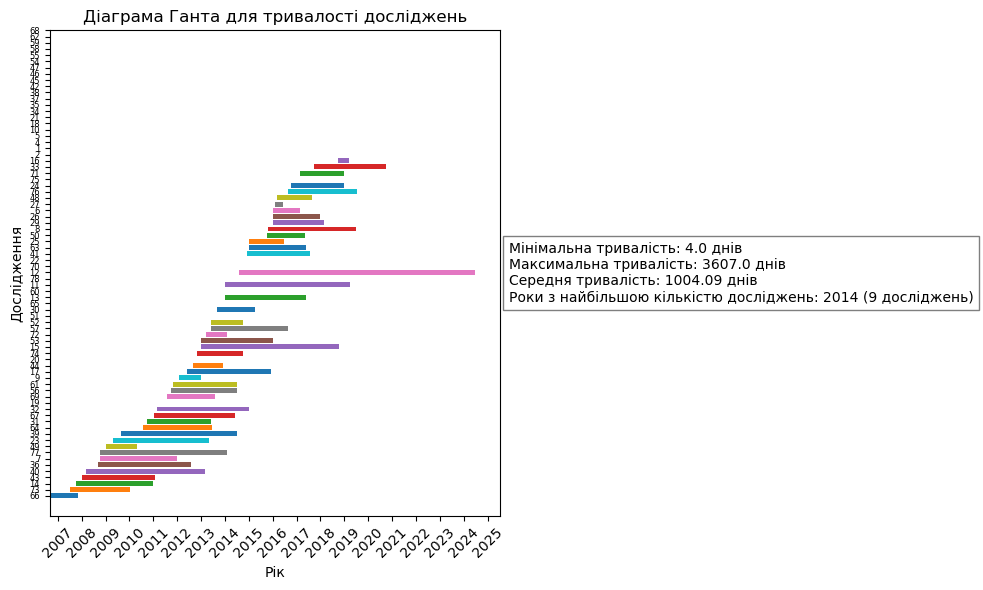

In [31]:
# Створення діаграми Ганта
fig, ax = plt.subplots(figsize=(10, 6))

# Відображення кожного дослідження як горизонтальної смуги
for i, (s_start, study_duration_days) in enumerate(zip(study_df['s_start'], study_df['study_duration_days'])):
    plt.barh(i, study_duration_days, left=s_start)

# Налаштування осі Y
ax.set_yticks(range(len(study_df)))
ax.set_yticklabels(study_df['study_id'], fontsize=6)  # Зменшення розміру шрифту для міток

# Форматування осі X для відображення тільки років
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Додаємо підписи
plt.xlabel('Рік')
plt.ylabel('Дослідження')
plt.title('Діаграма Ганта для тривалості досліджень')

# Додавання легенди з інформацією про роки з найбільшою кількістю досліджень
legend_text = (
    f"Мінімальна тривалість: {min_duration} днів\n"
    f"Максимальна тривалість: {max_duration} днів\n"
    f"Середня тривалість: {mean_duration:.2f} днів\n"
    f"Роки з найбільшою кількістю досліджень: {max_years_text}"
)
plt.text(1.02, 0.5, legend_text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Поворот міток на осі X для кращого вигляду
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Ensuring Data Consistency: Standardizing Country and Diagnosis Categories

Before diving deeper into our analysis, we need to ensure that the data in critical columns, like `s_country` and `diag_category`, is consistent and free of errors. This process helps us avoid discrepancies and prepares the data for smooth merging with other tables or for executing SQL queries.

### Steps Taken for Standardization:

- **Removing Extra Spaces**  
   We started by removing any leading or trailing spaces in the `s_country` and `diag_category` columns. Even small inconsistencies like extra spaces can cause issues when aggregating or merging data, so we made sure to clean them up.

- **Checking Unique Values**  
   To identify any variations or typos, we examined the unique values in each column. By doing this, we can spot if, for example, "USA" and "United States" are both used, or if "Depressive Disorder" appears in multiple formats. Standardizing these values ensures that each unique entry is correctly represented.

- **Handling Missing Values**  
   Missing values in these key columns could cause gaps in analysis. We checked for any null entries and identified whether any replacements or imputations would be necessary in later steps.

### Results:

After this cleaning and standardization process, `s_country` and `diag_category` are now more consistent and ready for detailed analysis. This step helps us build a strong foundation for the upcoming stages of our project, ensuring that our insights are based on well-structured and reliable data.

In [33]:
# Перевірка унікальних значень у колонках s_country та diag_category
print("Унікальні значення в колонці s_country:")
print(study_df['s_country'].unique())

print("\nУнікальні значення в колонці diag_category:")
print(study_df['diag_category'].unique())

# Перевірка на наявність пробілів на початку і в кінці
study_df['s_country'] = study_df['s_country'].str.strip()
study_df['diag_category'] = study_df['diag_category'].str.strip()

# Повторна перевірка унікальних значень після видалення пробілів
print("\nУнікальні значення в колонці s_country після видалення пробілів:")
print(study_df['s_country'].unique())

print("\nУнікальні значення в колонці diag_category після видалення пробілів:")
print(study_df['diag_category'].unique())

# Перевірка відсутніх значень
print("\nКількість відсутніх значень у колонці s_country:", study_df['s_country'].isna().sum())
print("Кількість відсутніх значень у колонці diag_category:", study_df['diag_category'].isna().sum())

Унікальні значення в колонці s_country:
['USA' 'Canada' 'Great Britain' 'Germany' 'Netherlands' 'China' 'Italy'
 'New Zealand' 'Australia' 'Spain' 'Iran' 'Brazil' 'Taiwan'
 'USA and Great Britain']

Унікальні значення в колонці diag_category:
['Adiposity' 'Cancer' 'Chronic pain' 'Anxiety disorder'
 'Depressive disorder with suicidal thoughts' 'PTSD/stress'
 'Depressive disorder' 'Diabetes and depressive disorder' 'HIV-positive'
 'Epilepsy' 'Sleep disturbance' 'Fibromyalgia' 'Intrusive tinnitus'
 'Gambling games' 'Autistic spectrum disorder' 'Multiple sclerosis'
 'Hypertension' 'other' 'Substance use disorder' 'Cognitive dysfunction'
 'Rapid weight loss' 'Infertility' 'Spontaneous intracerebral hemorrhage'
 'Other' 'ADHD' 'After the ambulance' 'Overeating' 'Addiction to smoking']

Унікальні значення в колонці s_country після видалення пробілів:
['USA' 'Canada' 'Great Britain' 'Germany' 'Netherlands' 'China' 'Italy'
 'New Zealand' 'Australia' 'Spain' 'Iran' 'Brazil' 'Taiwan'
 'USA and Gr

## Discovering Key Insights: A Taste of What's to Come

Let’s dive into our data to uncover three intriguing insights, each one giving us a glimpse into the patterns and potential hidden in this dataset. These insights will set the stage, adding a layer of curiosity as we prepare to dive deeper into the detailed analysis.

1. **The Largest Group**  
   Among all our study groups, one stands out for its size. Study ID 68 had the highest number of participants, with a total of **485 people** engaged. This substantial group size hints at the significance and impact of the research conducted with this group, drawing our attention to potential unique findings here.

2. **The Longest Study**  
   Length of time can sometimes reveal commitment and in-depth exploration. Study ID 12 holds the record for the longest duration, lasting a whopping **3,812 days**! This long-term engagement suggests a study designed to track profound or evolving outcomes, sparking interest in what such an extended period could reveal.

3. **The Most Common Diagnosis**  
   Patterns in diagnosis categories help us understand research trends and focal points. In this case, **"Depressive disorder"** emerges as the most frequently studied diagnosis, appearing in **10 studies**. This trend sheds light on a major area of concern and research, encouraging us to look closer at how different studies approached this common diagnosis.

These insights are just the beginning. As we move forward, we’ll dig deeper, drawing out more nuanced details and patterns that will provide a fuller picture of the data’s story.

In [35]:
# 1. Група з найбільшою чисельністю
largest_group = study_df.loc[study_df['s_n'].idxmax()]
print(f"Група з найбільшою чисельністю: study ID {largest_group['study_id']} з {largest_group['s_n']} учасниками")

# 2. Група з найдовшою тривалістю участі
longest_duration_group = study_df.loc[study_df['study_duration_days'].idxmax()]
print(f"Група з найдовшою тривалістю: study ID {longest_duration_group['study_id']} з тривалістю {longest_duration_group['study_duration_days']} днів")

# 3. Найбільш поширена категорія діагнозу
most_common_diag_category = study_df['diag_category'].value_counts().idxmax()
most_common_diag_count = study_df['diag_category'].value_counts().max()
print(f"Найбільш поширена категорія діагнозу: {most_common_diag_category}, зустрічається в {most_common_diag_count} дослідженнях")

Група з найбільшою чисельністю: study ID 68 з 485.0 учасниками
Група з найдовшою тривалістю: study ID 12 з тривалістю 3607.0 днів
Найбільш поширена категорія діагнозу: Depressive disorder, зустрічається в 10 дослідженнях


## Summary of Initial Data Analysis

In this initial phase, we laid the groundwork for a deeper analysis by ensuring data quality, visualizing study timelines, and uncovering key insights. Here’s a quick wrap-up of what we achieved:

- **Data Quality and Completeness**:  
  Using a heatmap, we assessed the quality and completeness of the data, highlighting any gaps. This gave us a clear view of where missing values might impact our analysis and where we may need to address data gaps.

- **Gantt Chart for Study Timelines**:  
  We constructed a Gantt chart to visualize study durations over time. This chart revealed patterns in study activity, showing both peak research periods and quieter times, giving context to the rhythm and intensity of our dataset’s studies.

- **Ensuring Data Consistency**:  
  We standardized entries in critical columns like `s_country` and `diag_category` by removing extra spaces and checking unique values. This standardization makes our data easier to merge, aggregate, and analyze without inconsistencies.

- **Key Insights Uncovered**:  
  Finally, we identified three intriguing insights: the largest study group by participants, the longest study duration, and the most common diagnosis category. These findings provide an engaging foundation for further exploration.

With this strong, clean base, we’re now ready to dive deeper and extract more detailed insights in the next stage of our analysis.